# Working with Bioinformatical Database APIs in Python

Examples of querying APIs of various biological databases using Python. Databases covered are:

* StringDB
* Ensembl
* KEGG
* PubChem
* MyGene

## Imports

In [1]:
# needed to display images of pathways
from IPython.display import Image

In [2]:
# for data wrangling, plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import os
# to send API calls
import requests

In [3]:
# to query KEGG and parse sequences and returns from the KEGG API we will use some modules from BioPython
from Bio import SeqIO
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas

# Querying Biological Databases

### Querying StringDB

StringDB is a database of protein-protein interactions (PPIs) and functional associations between proteins. It is based on the STRING (Search Tool for the Retrieval of Interacting Genes/Proteins) algorithm, which integrates information from a variety of sources, including experimental data and computational predictions, to predict PPIs and functional associations with high confidence. You can query the database to find interactions and functional associations for specific proteins or groups of proteins, and can also use the database to perform network-based analyses of PPIs and functional associations.

You can query the database directly from <b>string-db.org</b> or use the python package stringdb, of which some examples are given below.

In [4]:
# The stringdb python package is useful for easily querying the stringDB REST API
import stringdb

We define a list of genes and query stringDB for their associated string ids. Remember toprint the returned dataframe and verify that string returns the intended proteins. The ncbi taxon-id is per deafult set to 9606, only returning human proteins.

In [5]:
## Defining a list of genes
genes = ["JAK1", "STAT1"]
## Querying stringdb for string ids matching the provided genes
string_ids = stringdb.get_string_ids(genes)

In [6]:
string_ids

,queryItem,queryIndex,stringId,ncbiTaxonId,taxonName,preferredName,annotation
0,JAK1,0,9606.ENSP00000343204,9606,Homo sapiens,JAK1,Tyrosine-protein kinase JAK1; Tyrosine kinase ...
1,STAT1,1,9606.ENSP00000354394,9606,Homo sapiens,STAT1,Signal transducer and activator of transcripti...


The string-id's are then passed to other functions in the stringdb package, either performing an enrichment analysis or finding interactions. Below an enrichment analysis are performed for JAK1 and STAT1.

In [7]:
## Querying for an enrichment analysis
enrichment_df = stringdb.get_enrichment(string_ids.queryItem)

The results are categorized based on their nature. Below are the categories of the entries returned by querying for JAK1 and STAT1. We see that stringdb returns entries in the below categories:

In [8]:
enrichment_categories = enrichment_df["category"].drop_duplicates()
pd.DataFrame(enrichment_categories)

,category
0,Process
8,Keyword
9,KEGG
29,SMART
30,RCTM
40,WikiPathways
74,NetworkNeighborAL


Filtering for the known processes, we see that JAK1 and STAT1 both are involved in a number of interleukin and interferon pathways.

In [9]:
enrichment_df[enrichment_df["category"] == "Process"][["category", "term", "inputGenes", "p_value", "description"]]

,category,term,inputGenes,p_value,description
0,Process,GO:0038113,"JAK1,STAT1",2.870000e-07,interleukin-9-mediated signaling pathway
1,Process,GO:0038114,"JAK1,STAT1",2.350000e-07,interleukin-21-mediated signaling pathway
2,Process,GO:0060334,"JAK1,STAT1",1.970000e-06,Regulation of interferon-gamma-mediated signal...
3,Process,GO:0070102,"JAK1,STAT1",7.990000e-07,interleukin-6-mediated signaling pathway
4,Process,GO:0070106,"JAK1,STAT1",4.070000e-07,interleukin-27-mediated signaling pathway
5,Process,GO:0070757,"JAK1,STAT1",4.070000e-07,interleukin-35-mediated signaling pathway
6,Process,GO:0060333,"JAK1,STAT1",1.340000e-05,Interferon-gamma-mediated signaling pathway
7,Process,GO:0060337,"JAK1,STAT1",1.230000e-05,Type i interferon signaling pathway


Filtering for the keywords, we see that both proteins have an SH2-domain.

In [10]:
enrichment_df[enrichment_df["category"] == "Keyword"][["category", "term", "inputGenes", "p_value", "description"]]

,category,term,inputGenes,p_value,description
8,Keyword,KW-0727,"JAK1,STAT1",0.000031,SH2 domain


Filtering for KEGG-results, we get a number of pathways involving JAK1 and STAT1. The results both contain disease pathways and cellular pathways, for example pathways for Osteoclast differentiation and Th-cell differentiation. The KEGG-pathway can be qeried against the KEGG-API to return an image of the pathway, the involved compounds/proteins etc. Examples of this are given in the 'Querying KEGG'-section.

In [11]:
enrichment_df[enrichment_df["category"] == "KEGG"][["category", "term", "inputGenes", "p_value", "description"]]

,category,term,inputGenes,p_value,description
9,KEGG,hsa04217,"JAK1,STAT1",0.000059,Necroptosis
10,KEGG,hsa04380,"JAK1,STAT1",0.000040,Osteoclast differentiation
11,KEGG,hsa04621,"JAK1,STAT1",0.000080,NOD-like receptor signaling pathway
12,KEGG,hsa04630,"JAK1,STAT1",0.000068,JAK-STAT signaling pathway
13,KEGG,hsa04658,"JAK1,STAT1",0.000021,Th1 and Th2 cell differentiation
14,KEGG,hsa04659,"JAK1,STAT1",0.000027,Th17 cell differentiation
15,KEGG,hsa05140,"JAK1,STAT1",0.000013,Leishmaniasis
16,KEGG,hsa05145,"JAK1,STAT1",0.000030,Toxoplasmosis
17,KEGG,hsa05152,"JAK1,STAT1",0.000075,Tuberculosis
18,KEGG,hsa05160,"JAK1,STAT1",0.000065,Hepatitis C


Results from SMART (Simple Modular Architecture Research Tool) likewise show that both proteins have an SH2-domain.

In [12]:
enrichment_df[enrichment_df["category"] == "SMART"]

,category,term,number_of_genes,number_of_genes_in_background,ncbiTaxonId,inputGenes,preferredNames,p_value,fdr,description
29,SMART,SM00252,2,96,9606,"JAK1,STAT1","JAK1,STAT1",0.000025,0.018,Src homology 2 domains


Pathway involvements from Reactome are also returned

In [13]:
enrichment_df[enrichment_df["category"] == "RCTM"].head(3)

,category,term,number_of_genes,number_of_genes_in_background,ncbiTaxonId,inputGenes,preferredNames,p_value,fdr,description
30,RCTM,HSA-1059683,2,11,9606,"JAK1,STAT1","JAK1,STAT1",4.070000e-07,0.00062,Interleukin-6 signaling
31,RCTM,HSA-877312,2,14,9606,"JAK1,STAT1","JAK1,STAT1",6.270000e-07,0.00062,Regulation of IFNG signaling
32,RCTM,HSA-8854691,2,25,9606,"JAK1,STAT1","JAK1,STAT1",1.830000e-06,0.00062,Interleukin-20 family signaling


You can query stringdb for predicted interaction partners for our list of proteins.

## Querying for Protein-Protein Interactions

You can also query stringDB for protein-protein interactions. These are scored by stringdb based on the certainty of the interaction.

In [14]:
### Querying for interaction partners
interaction_df = stringdb.get_interaction_partners(string_ids.queryItem)
len(interaction_df)

955

As seen above, we are returned 955 interactions. We can filter out all interactions with a score less than .9 to narrow down the results.

In [18]:
interaction_df_sub = interaction_df[interaction_df["score"] > .9]

## Visualizing Protein-Protein Interaction Networks with NetworkX and pyvis

In [19]:
from pyvis.network import Network
import networkx as nx

There are many available python packages that allows us to visualize network graphs. Two of these are NetworkX and Stringvis, and we can use both to visualize the interactions that we query StringDB for.

NetworkX has a built in method to create a graph from the dataframe that the stringdb-package returns upon a query.

In [20]:
G = nx.from_pandas_edgelist(interaction_df_sub, source = "preferredName_A", target = "preferredName_B", edge_attr = True)

In [21]:
pos = nx.spring_layout(G,scale=10)

NetworkX is great for creating our network graphs, but the visualization is not great when dealing with large amounts of data. You can greate a pyvis network object, and use the from_nx method to easily convert the nx graph to a pyvis graph.

In [22]:
g = Network(height=400, width=400, notebook=True)

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [23]:
g.from_nx(G)

In [24]:
#g.show("ex.html")

Pyvis allows a lot of customization of the network graphs. You can add labels to the nodes and edges, change their size and width, color them and so on. This could help us better understand our interaction network, for example by coloring proteins with known functions (DNA-binding, kinase activity...) or with known intracellular locations. You can specify either a title, shape, size or color.

## Querying for Functional Annotations

You can also query stringDB for functional annotations of your protein

In [25]:
functional_annotation_df = stringdb.get_functional_annotation(string_ids.queryItem)
functional_annotation_df.head(3)

,category,term,number_of_genes,ratio_in_set,ncbiTaxonId,inputGenes,preferredNames,description
0,COMPARTMENTS,GOCC:0000785,1,0.5,9606,STAT1,STAT1,Chromatin
1,COMPARTMENTS,GOCC:0005576,1,0.5,9606,STAT1,STAT1,Extracellular region
2,COMPARTMENTS,GOCC:0005615,1,0.5,9606,STAT1,STAT1,Extracellular space


The functional annotations are categorized relating the proteins to for example a specific cellular compartment, process, function tissue, disease. 

In [26]:
functional_annotation_df["category"].drop_duplicates()

0           COMPARTMENTS
39               Process
358            Component
399             Function
475              TISSUES
513             DISEASES
549              Keyword
578                SMART
583             InterPro
611                 Pfam
618                 RCTM
681         WikiPathways
743                  HPO
996    NetworkNeighborAL
Name: category, dtype: object

Filtering the dataframe to entries from InterPro, we can get an overview of known protein domains in the queried proteins.

In [27]:
functional_annotation_df[functional_annotation_df["category"].isin(["Pfam", "InterPro"])].head(5)

,category,term,number_of_genes,ratio_in_set,ncbiTaxonId,inputGenes,preferredNames,description
583,InterPro,IPR000299,1,0.5,9606,JAK1,JAK1,FERM domain
584,InterPro,IPR000719,1,0.5,9606,JAK1,JAK1,Protein kinase domain
585,InterPro,IPR000980,2,1.0,9606,"JAK1,STAT1","JAK1,STAT1",SH2 domain
586,InterPro,IPR001217,1,0.5,9606,STAT1,STAT1,Transcription factor STAT
587,InterPro,IPR001245,1,0.5,9606,JAK1,JAK1,"Serine-threonine/tyrosine-protein kinase, cata..."


Likewise the dataframe can be filtered for disease associations.

In [28]:
functional_annotation_df[functional_annotation_df["category"] == "DISEASES"][["preferredNames", "description"]].head(5)

,preferredNames,description
513,STAT1,Disease by infectious agent
514,STAT1,Systemic mycosis
515,STAT1,Monogenic disease
516,JAK1,Organ system cancer
517,STAT1,Autosomal recessive disease


Or for functional annotations...

In [29]:
functional_annotation_df[functional_annotation_df["category"] == "Function"]

,category,term,number_of_genes,ratio_in_set,ncbiTaxonId,inputGenes,preferredNames,description
399,Function,GO:0000166,1,0.5,9606,JAK1,JAK1,Nucleotide binding
400,Function,GO:0000976,1,0.5,9606,STAT1,STAT1,Transcription regulatory region sequence-speci...
401,Function,GO:0000977,1,0.5,9606,STAT1,STAT1,RNA polymerase II transcription regulatory reg...
402,Function,GO:0000978,1,0.5,9606,STAT1,STAT1,RNA polymerase II cis-regulatory region sequen...
403,Function,GO:0000979,1,0.5,9606,STAT1,STAT1,RNA polymerase II core promoter sequence-speci...
...,...,...,...,...,...,...,...,...
470,Function,GO:0140297,1,0.5,9606,STAT1,STAT1,DNA-binding transcription factor binding
471,Function,GO:1901265,1,0.5,9606,JAK1,JAK1,Nucleoside phosphate binding
472,Function,GO:1901363,2,1.0,9606,"JAK1,STAT1","JAK1,STAT1",Heterocyclic compound binding
473,Function,GO:1990837,1,0.5,9606,STAT1,STAT1,Sequence-specific double-stranded dna binding


As well as for keywords...

In [30]:
functional_annotation_df[functional_annotation_df["category"] == "Keyword"].head(5)

,category,term,number_of_genes,ratio_in_set,ncbiTaxonId,inputGenes,preferredNames,description
549,Keyword,KW-0007,2,1.0,9606,"JAK1,STAT1","JAK1,STAT1",Acetylation
550,Keyword,KW-0010,1,0.5,9606,STAT1,STAT1,Activator
551,Keyword,KW-0013,1,0.5,9606,STAT1,STAT1,ADP-ribosylation
552,Keyword,KW-0025,1,0.5,9606,STAT1,STAT1,Alternative splicing
553,Keyword,KW-0051,1,0.5,9606,STAT1,STAT1,Antiviral defense


# Querying Ensembl

Ensembl is a database of genomic data for a wide range of species, including vertebrates and some model organisms. The database is produced by the Ensembl project, which is a collaboration between the European Bioinformatics Institute (EBI) and the Wellcome Trust Sanger Institute. Ensembl provides a comprehensive set of tools and resources for analyzing and manipulating genomic data, including a genome browser, a variety of data mining and visualization tools, and a suite of APIs for programmatic access to the data. Ensembl's data includes genome assembly, annotation of genes, transcripts, and functional elements, as well as variation and comparative genomics. 

You can query Ensembls REST-API directly with the built-in python module requests, but there is already a python interface for the Ensembl API in the package ensembl-rest. For a full overview of the API endpoints, have a look at http://rest.ensembl.org/

In [31]:
import ensembl_rest

When querying stringdb we are returned gene symbols and an ensemble protein ID. To further work with the data, we might be interested in getting other the Ensembl transcript ID or gene ID.

In [32]:
# getting string ids for Atk
string_ids = stringdb.get_string_ids(["AKT1"])

In [33]:
# querying for Akt Interactions
akt_interactions = stringdb.get_interaction_partners(string_ids.queryItem)

When looking up a protein ID with the Ensembl API, we are returned the ID of the parent. In the case of a protein ID, the parent ID will be the transcript ID. The parent ID of the transcript ID will be the gene ID. Here is a quick function that returns a list of parent IDs from ensembl ID's stored in a dataframe column.

In [34]:
def get_parent_ids(dataframe, column, remove_species = False):
    try:
        
        if remove_species == True:
            row_vals = [i[5:] for i in dataframe[column].to_list()]
        else:
            row_vals = dataframe[column].to_list()
            
        result_list = [ensembl_rest.lookup(i)["Parent"] for i in row_vals]
        
        return result_list

    except:
        return "error: parent not found"

In [35]:
akt_interactions["transcriptId_B"] = get_parent_ids(dataframe=akt_interactions, column = "stringId_B", remove_species = True)

In [36]:
akt_interactions["geneId_B"] = get_parent_ids(dataframe=akt_interactions, column = "transcriptId_B")

In [37]:
akt_interactions.head(3)

,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore,transcriptId_B,geneId_B
0,9606.ENSP00000451828,9606.ENSP00000354558,AKT1,MTOR,9606,0.999,0,0,0,0.081,0.904,0.9,0.991,ENST00000361445,ENSG00000198793
1,9606.ENSP00000451828,9606.ENSP00000335153,AKT1,HSP90AA1,9606,0.999,0,0,0,0.062,0.946,0.9,0.991,ENST00000334701,ENSG00000080824
2,9606.ENSP00000451828,9606.ENSP00000385824,AKT1,FOXO3,9606,0.999,0,0,0,0.055,0.939,0.9,0.972,ENST00000406360,ENSG00000118689


With the gene ID's in place, we can query for the nucleotide sequence in FASTA format.

In [38]:
gene_ids = akt_interactions["geneId_B"].to_list()
fasta_list = [ensembl_rest.sequence_id(i, headers={'content-type': 'text/x-fasta'}) for i in gene_ids]

In [39]:
akt_interactions["sequence_B"] = fasta_list

The results is a dataframe of interactions also containing the FASTA nucleotide sequence for the protein that is ready for further sequence analysis.

In [40]:
akt_interactions.head(5)

,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore,transcriptId_B,geneId_B,sequence_B
0,9606.ENSP00000451828,9606.ENSP00000354558,AKT1,MTOR,9606,0.999,0,0,0,0.081,0.904,0.9,0.991,ENST00000361445,ENSG00000198793,>ENSG00000198793.14 chromosome:GRCh38:1:111065...
1,9606.ENSP00000451828,9606.ENSP00000335153,AKT1,HSP90AA1,9606,0.999,0,0,0,0.062,0.946,0.9,0.991,ENST00000334701,ENSG00000080824,>ENSG00000080824.19 chromosome:GRCh38:14:10208...
2,9606.ENSP00000451828,9606.ENSP00000385824,AKT1,FOXO3,9606,0.999,0,0,0,0.055,0.939,0.9,0.972,ENST00000406360,ENSG00000118689,>ENSG00000118689.15 chromosome:GRCh38:6:108559...
3,9606.ENSP00000451828,9606.ENSP00000297494,AKT1,NOS3,9606,0.999,0,0,0,0.049,0.879,0.9,0.988,ENST00000297494,ENSG00000164867,>ENSG00000164867.11 chromosome:GRCh38:7:150991...
4,9606.ENSP00000451828,9606.ENSP00000262719,AKT1,PHLPP1,9606,0.999,0,0,0,0.062,0.731,0.9,0.981,ENST00000262719,ENSG00000081913,>ENSG00000081913.14 chromosome:GRCh38:18:62715...


In [41]:
akt_interactions.iloc[1]["sequence_B"].split("\n")

['>ENSG00000080824.19 chromosome:GRCh38:14:102080742:102139699:-1',
 'AGGCTCCTCCCCCGGGTGTGGCCTCCGGGCGGCATGGCTGCTTCCCAGGTGATGCCGGCT',
 'TCAGCTAGTGGGGTCTAGTTGACCGTTCCGCAGCCGCCAGGGCCAGCGGAAAGCCGGTCA',
 'GGGGGAACCGCGGCGGGGCTGGTGTCATGAGCCTGAGGTGAACTTGAGGGTGCCTCCTCA',
 'GCGGTCTCCCGCCCTGCCCTGAGGGGCGCCGGGACCCCAAAGAGCGGAGGAAGAGCGCCA',
 'CCCCGACGGCCACCGCTTCGGAGCCAGCACGCGGGGTACCCTACGGGGAGCGCGGATGCC',
 'CCCGTGTTCGGGCGGGGACGGCTCCACCCCTCCTGGGCCCTCCCTTCGGGACAGGGACTG',
 'TCCCGCCCAGAGTGCTGAATACCCGCGCGACCGTCTGGATCCCCGCCCAGGAAGCCCCTC',
 'TGAAGCCTCCTCGCCGCCGTTTCTGAGAAGGTACCAAGGGACTCAAGATTTACGCTTCAC',
 'TATGTTTTATTTCAGGCGGGGTAGGGGGAGAGAAGAATGTGGTACAGCATAGGTGTTCTC',
 'AAGCCAGATATCCTAATTCCTGCGTGTGATGAGCACTGGCGGCCTCCGCTTCTTAGCGGA',
 'GGTTTGTCCTCTCCAGCTGTTCAGAAACACGGGGCGGGGAAGCGCTTTGGGAACCGGGGA',
 'CTGAATCTTTTTAGGATTCACTGATCTTGCTCAGTAGGTTACGAAGAGCTCTTAATAAAA',
 'TTTAAGGTAATTGTTTTTTTTTCCAGAAGCCTCAGGTGGAGTCTGTGAGATTATTTACTA',
 'GTAGATCCATAGGGATAGTTGTATGCATGTAATGTACAGGGTCTAGATTTATAAGGACGG',
 'GCACACGTGTCAAAGTAAGA

# Querying KEGG

KEGG (Kyoto Encyclopedia of Genes and Genomes) is a database that links genomic information with higher-order functional information, such as metabolic pathways and diseases. The database contains a wide range of data, including genomic information for a variety of organisms, information on metabolic pathways and reactions, and data on genetic interactions and diseases. KEGG also provides a set of bioinformatics tools for analyzing and visualizing this data, including a pathway viewer and a variety of data mining and analysis tools.

In [42]:
from Bio.KEGG import REST

In [43]:
# a quick monkeypatch for an error often arising when querying the KEGG API
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#### Fetching and Displaying Pathways

It's pretty straight-forward to fetch a KEGG pathway and display it in the notebook, but you will need to import a couple of packages. We can try to get and display the insulin signalling pathway (hsa04910).

In [44]:
import PIL
import io

In [45]:
pathway = REST.kegg_get(["hsa04910"], "image").read()

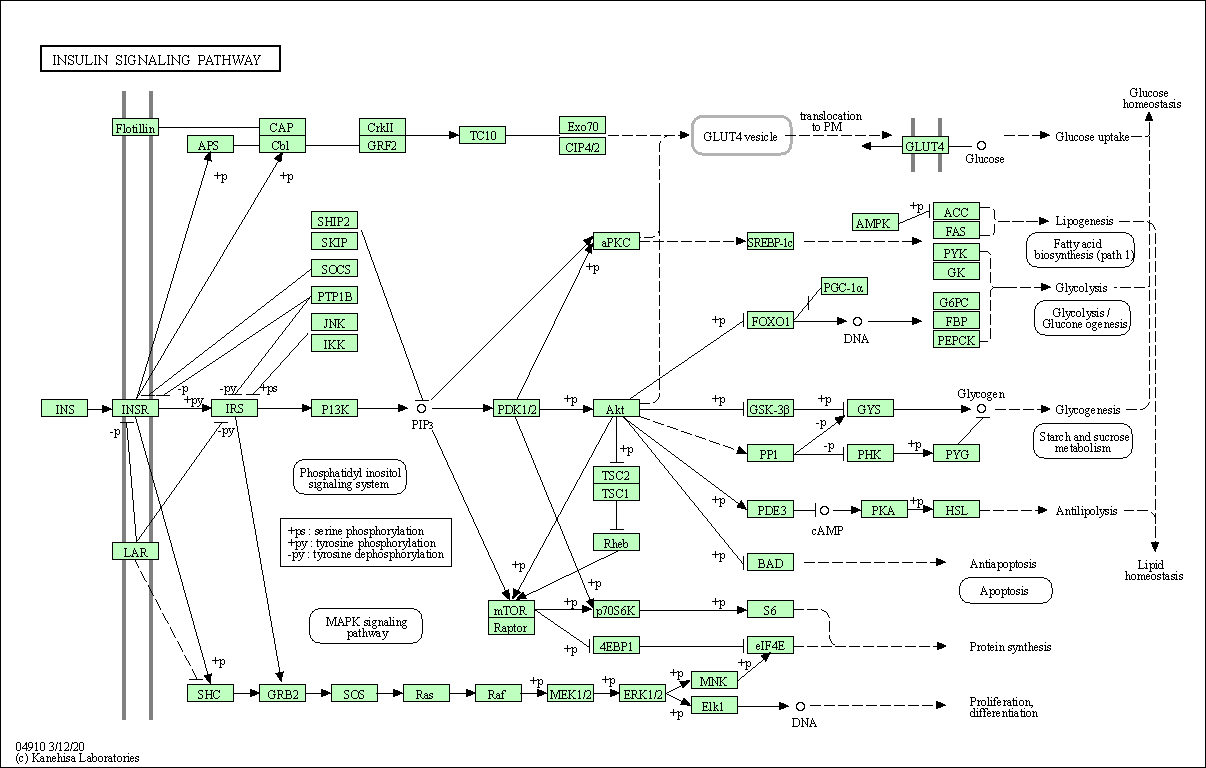

In [46]:
Image(pathway)

We can also get the object describing the pathway, involved genes, drugs, and so on.

In [47]:
ins_pathway = REST.kegg_get("path:hsa04910").read()

In [48]:
ins_pathway_split = ins_pathway.split("\n")

We can from the response extract drugs targeting the insulin-signalling pathway.

In [49]:
ins_pathway_split[6:30]

['DRUG        D00085  Insulin (JAN/USP)',
 '            D00595  Buformin (USAN/INN)',
 '            D00944  Metformin hydrochloride (JP18/USP)',
 '            D01238  Bucladesine sodium (JAN)',
 '            D01896  Cilostazol (JP18/USP/INN)',
 '            D02206  Buformin hydrochloride (JP18)',
 '            D03230  Insulin human (USP/INN)',
 '            D03250  Insulin glargine (USAN/INN)',
 '            D04050  Ertiprotafib (USAN/INN)',
 '            D04475  Insulin aspart (USP/INN)',
 '            D04477  Insulin lispro (USP/INN)',
 '            D04537  Ingliforib (USAN/INN)',
 '            D04539  Insulin detemir (USAN/INN)',
 '            D04540  Insulin glulisine (USAN/INN)',
 '            D04541  Insulin human, isophane (USP)',
 '            D04542  Insulin human zinc (USP)',
 '            D04543  Insulin human zinc, extended (USP)',
 '            D04544  Insulin I 125 (USAN)',
 '            D04545  Insulin I 131 (USAN)',
 '            D04546  Insulin, dalanated (USAN)',
 '  

## Converting KEGG IDs to Uniprot or NCBI gene IDs

The KEGG API can also be used to interconvert between KEGG IDs and Uniprot or NCBI gene IDs

In [50]:
resp = REST.kegg_conv("uniprot", "hsa:9993")
resp.read()

'hsa:9993\tup:P98153\nhsa:9993\tup:Q8IWC8\n'

In [51]:
resp = REST.kegg_conv("ncbi-geneid", "hsa:9993")
resp.read()

'hsa:9993\tncbi-geneid:9993\n'

We can also query for genes...

In [52]:
def to_df(result):
    return pd.read_table(io.StringIO(result), header=None)

In [ ]:
result = REST.kegg_find("genes", "INSR").read()
to_df(result)

#### Working with compounds

There are a few limited options to search for compounds. One option is to query by molecular weight. Below KEGG compounds is queried for compounds with a molecular weight between 200 and 257 g/mol.

In [ ]:
result = REST.kegg_find("compound", "200-257/mol_weight").read()
to_df(result)

We can also directly query for a compound, for example we could query for Pyruvate. The returned info contain the chemical forula, mass and name for the compound. Also known reactions and pathways as well as enzymes acting on the compound are returned. PubChem, ChEBI IDs and the CAS number are also returned.

In [ ]:
result = REST.kegg_get("cpd:C00022")

In [ ]:
parsed = {}

In [ ]:
#for line in result:
    #print(line)

In [ ]:
for line in result.read().split("\n"):
    print(line)

It's also possible to directly query for an image of the chemical formula of the compound.

In [ ]:
result = REST.kegg_get("cpd:C00022", "image").read()
Image(result)

# Querying PubChem

Another package useful for quering pubchem is pubchempy.

In [ ]:
import pubchempy as pcp
from pubchempy import Compound
from pubchempy import Substance

From querying KEGG, wei retrieved the PubChem substance id for Pyruvate: 3324. 

In [ ]:
return_df = pcp.get_substances(3324, namespace=u'sid', as_dataframe=True)

In [ ]:
return_df

We can instantiate a Substance object from the substance ID and get the associated standardized compound ID.

In [ ]:
substance = Substance.from_sid(3324)

In [ ]:
substance.to_dict()

In [ ]:
substance.standardized_cid

From the cid we can instantiate a Compound object, and retrieve information associated with the compound.

In [ ]:
pyruvate = Compound.from_cid(substance.standardized_cid)

Below is a dataframe of the keys contained in the Compound dictionary. 

In [ ]:
pd.DataFrame(pyruvate.to_dict().keys())

From the compound object we can retrieve things like the iupac_name, charge, pharmacophore features and perhaps most importably a SMILES string.

In [ ]:
pyruvate.iupac_name

In [ ]:
pyruvate.charge

In [ ]:
pyruvate.canonical_smiles

The PubChem data can be further analysed with packages like RDKit.

# Querying mygene.info

mygene.info is a web-based service for querying and retrieving information about genes and their associated proteins. It provides a simple, programmatic interface to a database of gene annotation information from multiple sources, including Ensembl, Entrez Gene, and UniProt. Users can query the database using various identifiers, such as gene symbols, Entrez Gene IDs, and Ensembl IDs, and retrieve information about the corresponding genes, such as their genomic location, associated proteins, and functional annotation. mygene.info also provides a Python package that allows users to programmatically access the database.

In [ ]:
import mygene
mg = mygene.MyGeneInfo()

In [ ]:
# Querying for JAK3
result = mg.getgene('ENSG00000105639')

You can query mygene for a short summary of the protein and its functions.

In [ ]:
result["summary"]

You can also query for known cellular and organismal functions that the protein is associated with.

In [ ]:
qualifiers = [i["qualifier"] for i in result["go"]["BP"]]
terms = [i["term"] for i in result["go"]["BP"]]

In [ ]:
for i, j in zip(qualifiers, terms):
    print(f"{i}: {j}")

Mygene can also be queried for pathways, both ones from biocarta, KEGG, netpath, pid, Reactome and WikiPathways

In [ ]:
# Subsetting for pathways
result["pathway"].keys()

In [ ]:
for i in result["pathway"].keys():
    
    print("\n"+i+"\n")
    
    for i in result["pathway"][i]:
        
        id = i["id"]
        name = i["name"]
        
        print(f"{id}: {name}")

Mygene can also be queried for articles from Pubmed. Also returned is a short text summarizing the proteins in the article.

In [ ]:
for i in result["generif"]:
    
    pubmed = i["pubmed"]
    text = i["text"]
    
    print(f"\n Pubmed: {pubmed}\n\nText: {text}")

InterPro results regarding domains found in the protein can also be found.

In [ ]:
for i in result["interpro"]:
    
    desc = i["desc"]
    id = i["id"]
    short_desc = i["short_desc"]
    
    print(f"{desc} | {id} | {short_desc}")

The gene coding for the protein can also be mapped to the hg19 reference genome.

In [ ]:
result["genomic_pos_hg19"]